Here, we print out the 25 most common words that occur in the texts. For sake of simplicity, we are only sifting through NarrativeCME. We may look into NarrativeLE later.

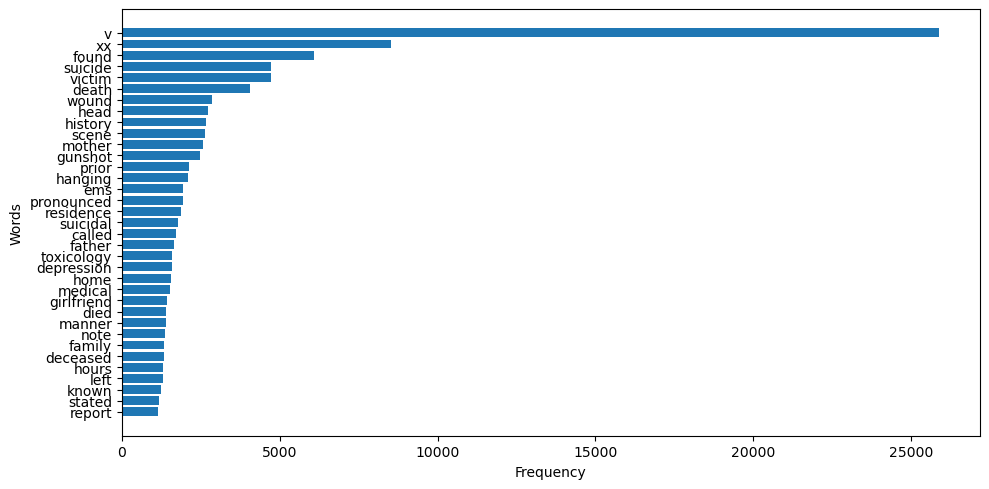

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from nltk.util import ngrams
import string

# Load the CSV file
df = pd.read_csv('data/train_features.csv')

# Assuming 'text' is the column with the text data
text = df['NarrativeCME'].astype(str)

# Tokenization
tokens = text.apply(word_tokenize)

# Convert to lowercase
tokens = tokens.apply(lambda x: [w.lower() for w in x])

# Remove punctuation and non-alphabetic tokens
tokens = tokens.apply(lambda x: [word for word in x if word.isalpha()])

# Filter out stop words
stop_words = set(stopwords.words('english'))
tokens = tokens.apply(lambda x: [w for w in x if w not in stop_words])

# Flatten the list of tokens
all_tokens = [token for sublist in tokens for token in sublist]

# Frequency distribution
freq_dist = nltk.FreqDist(all_tokens)

# Most common words
most_common = freq_dist.most_common(35)

# Most common words
words = [word[0] for word in most_common]
counts = [word[1] for word in most_common]

# Visualization (Horizontal bar graph with reversed Y-axis)
plt.figure(figsize=(10, 5))  # Adjust the size
plt.barh(words, counts)  # Horizontal bar chart
plt.gca().invert_yaxis()  # Reverse the order of Y-axis
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


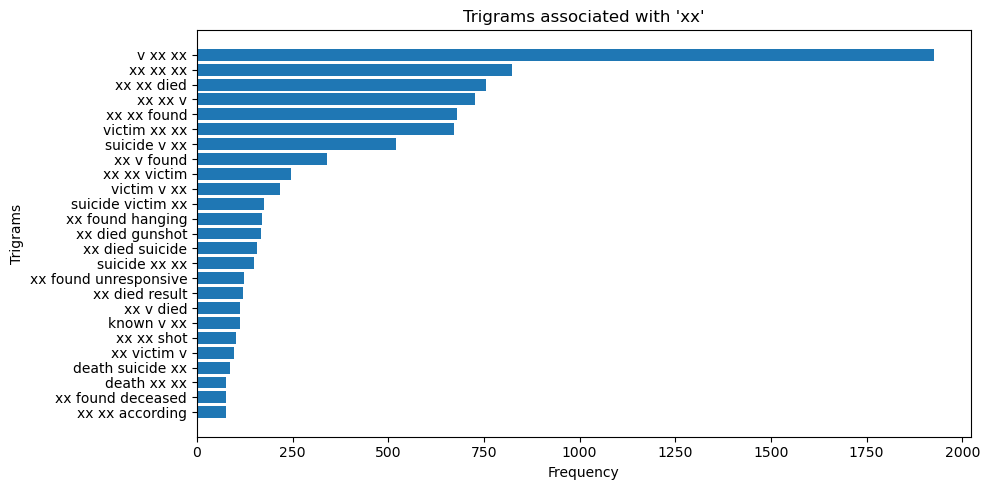

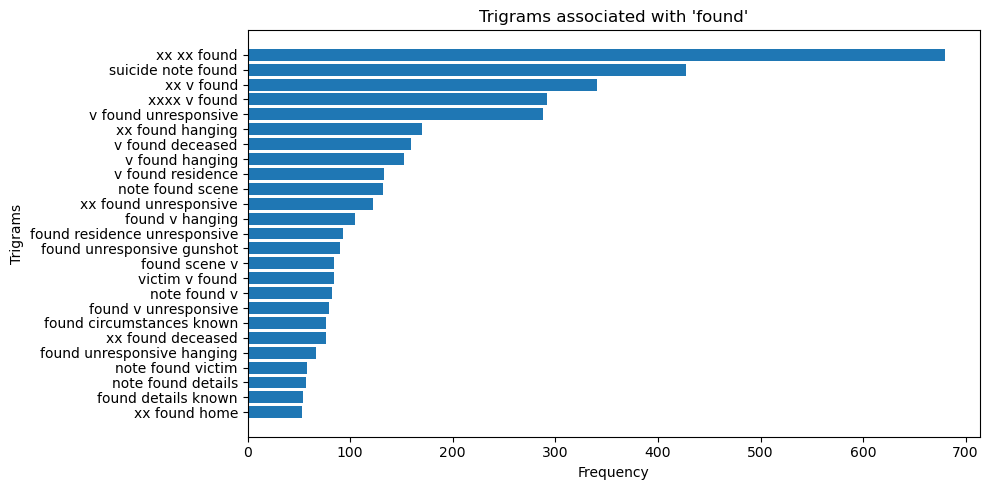

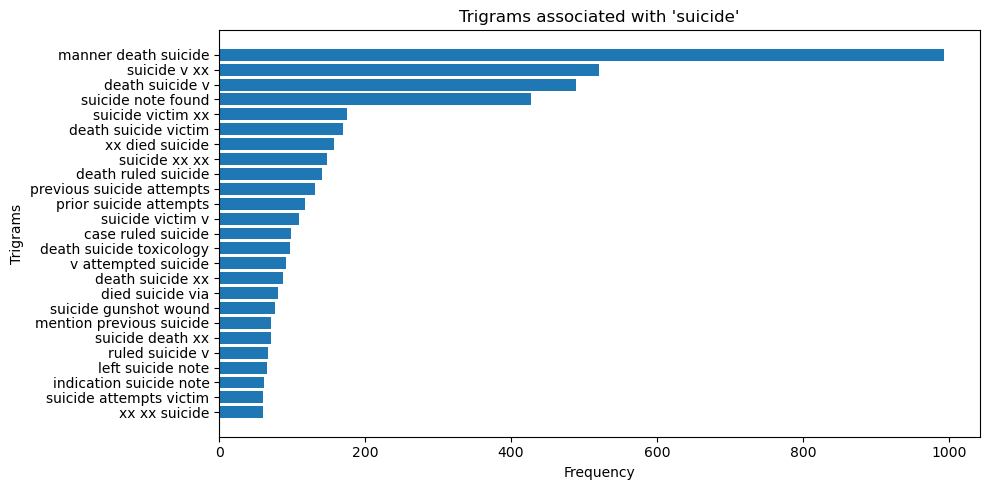

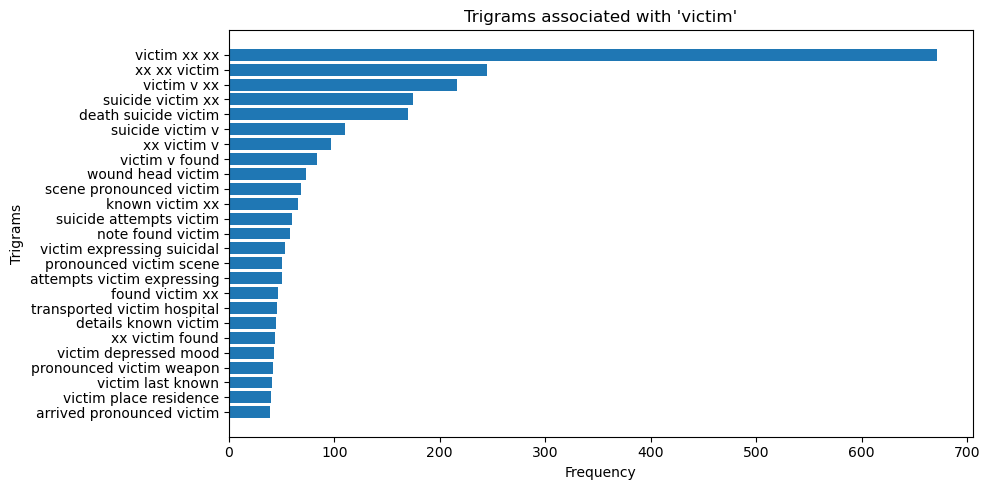

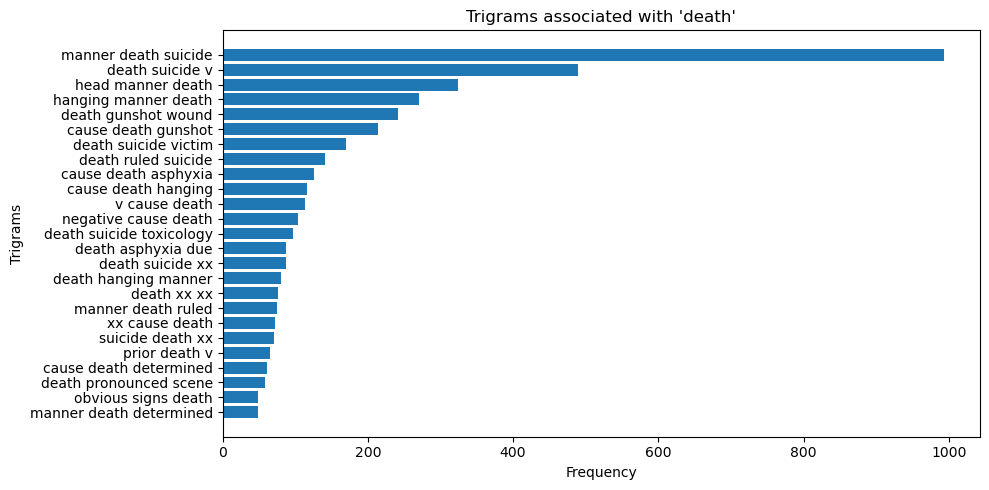

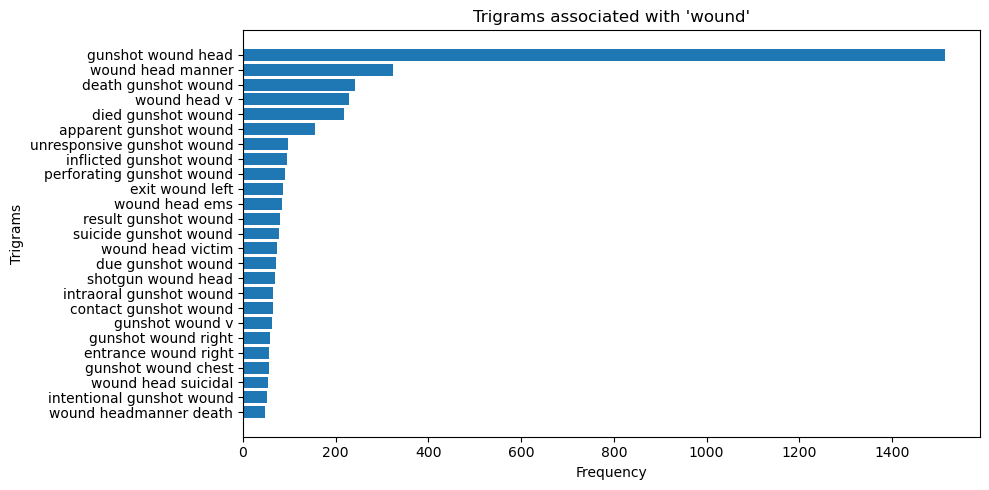

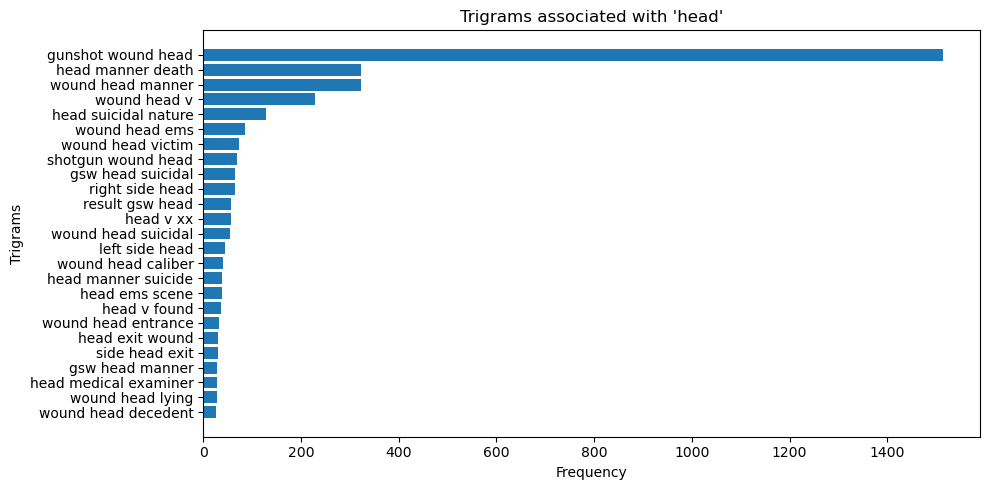

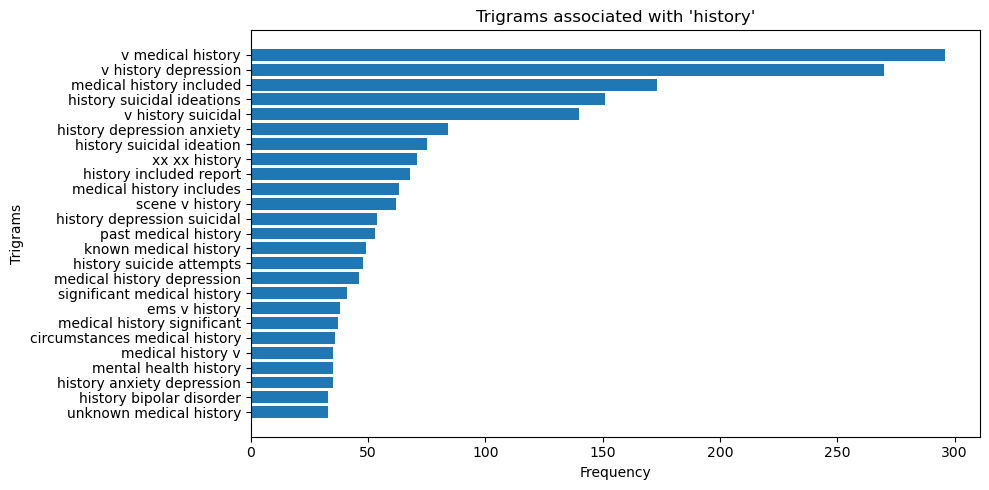

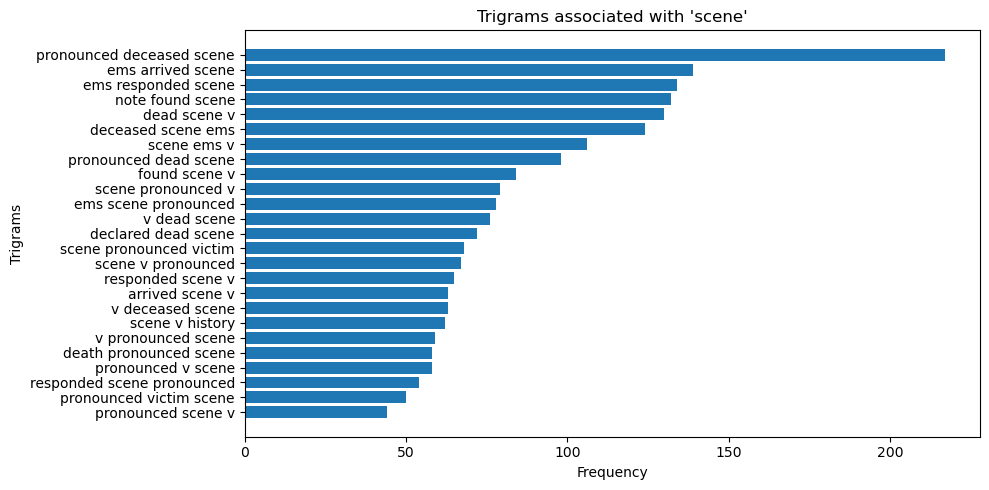

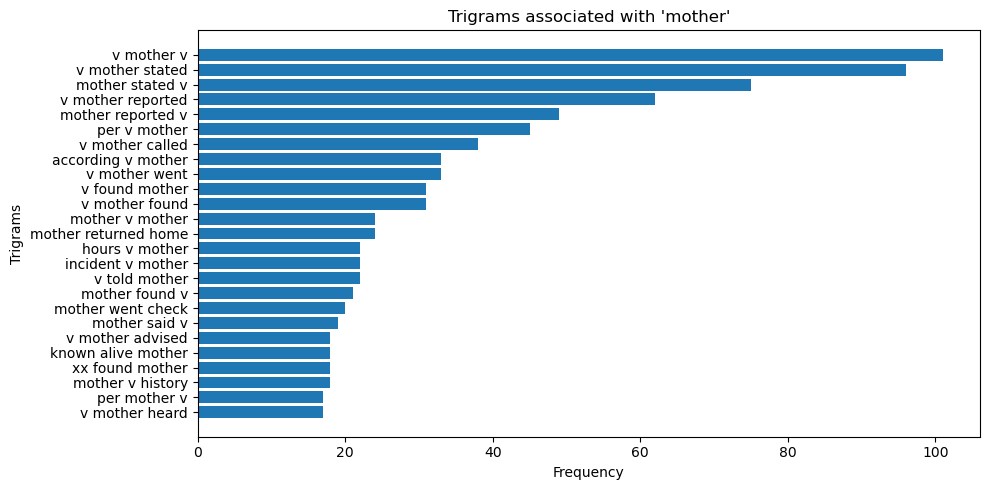

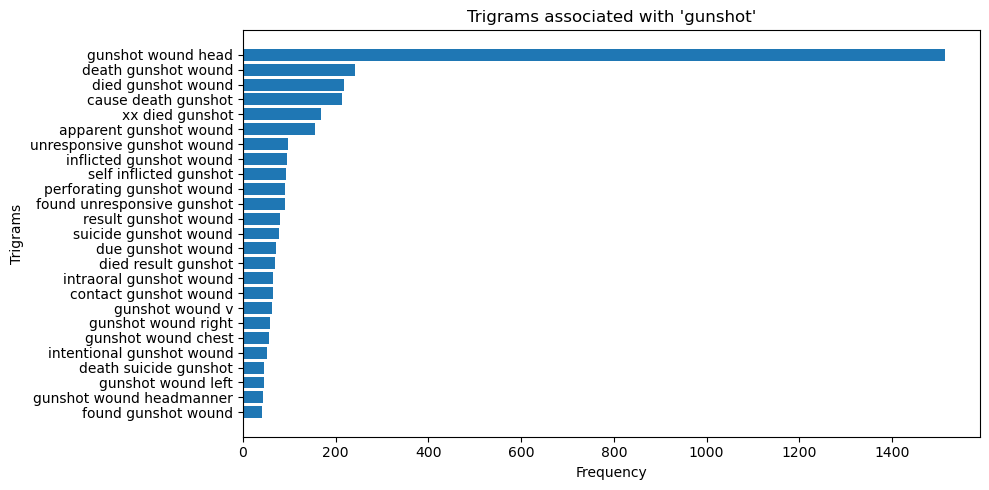

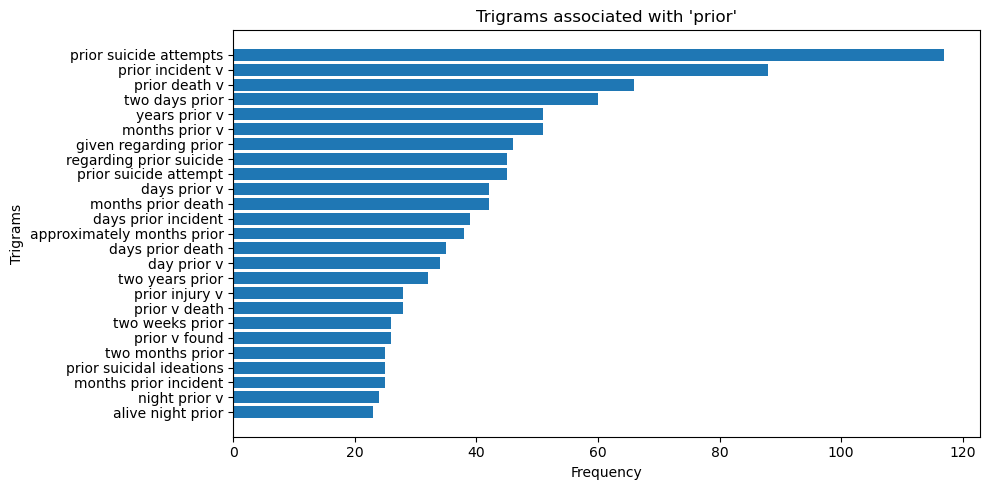

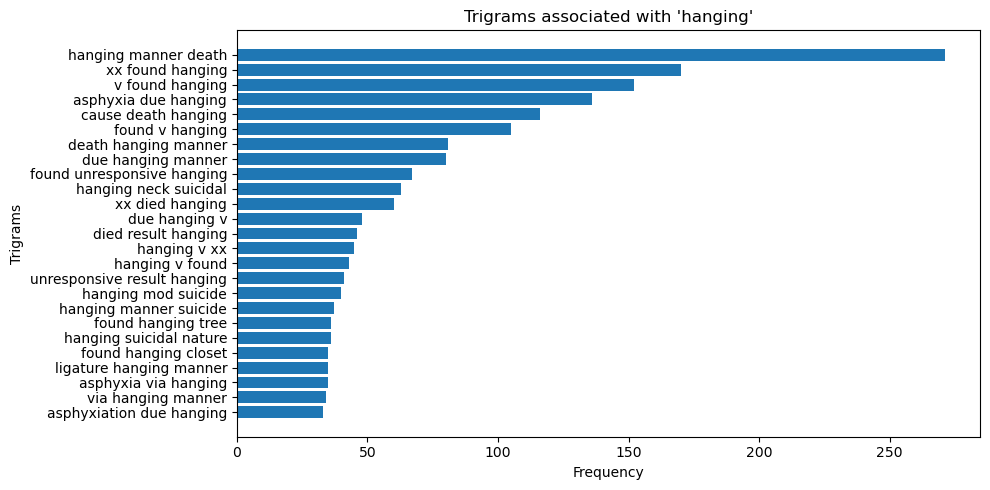

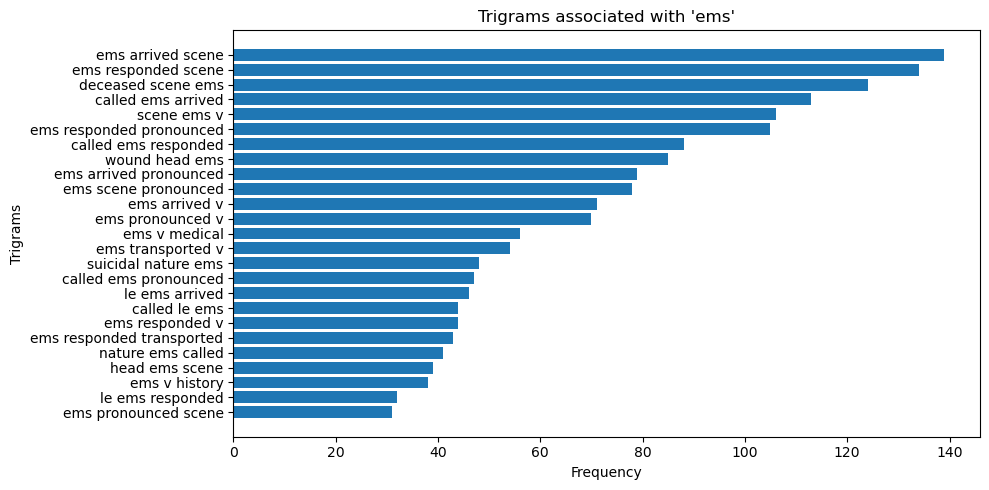

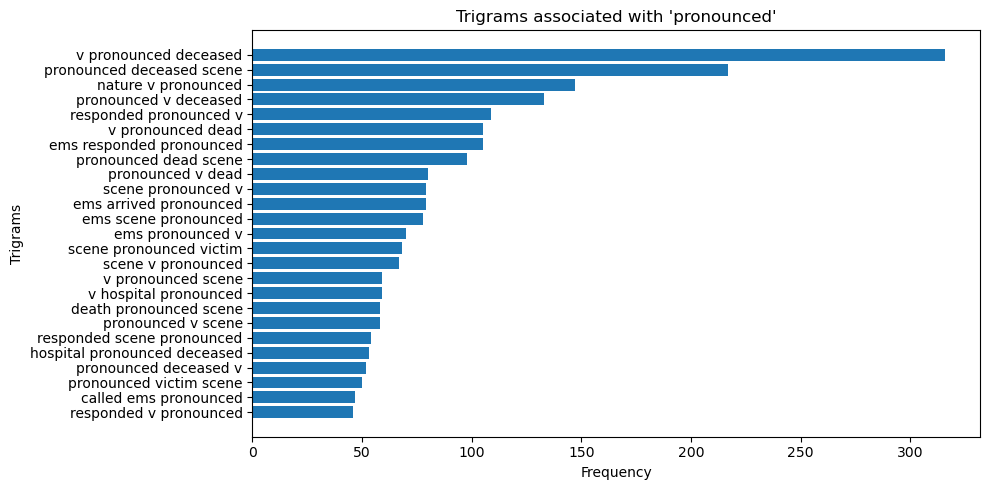

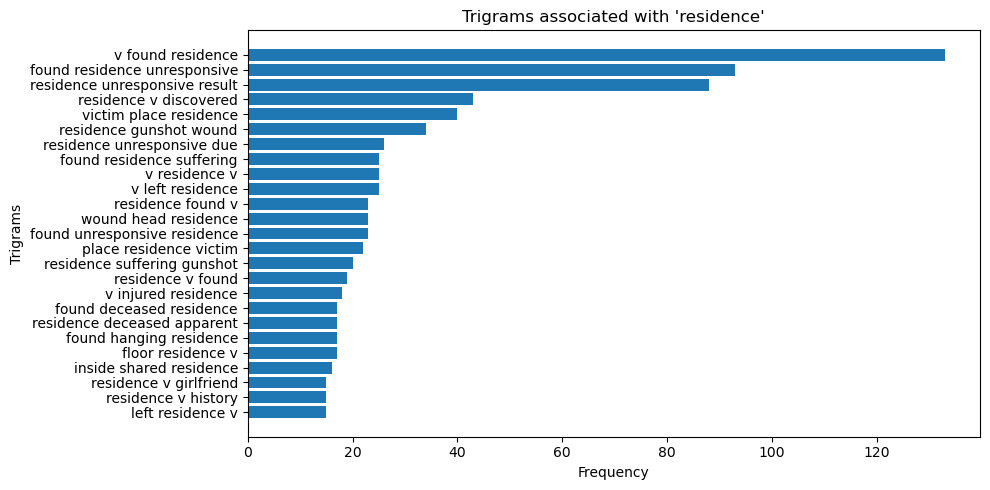

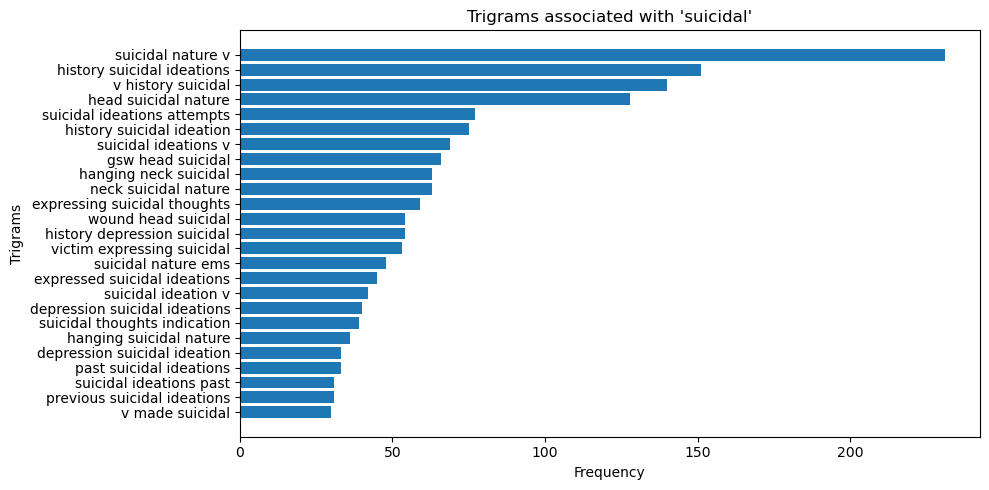

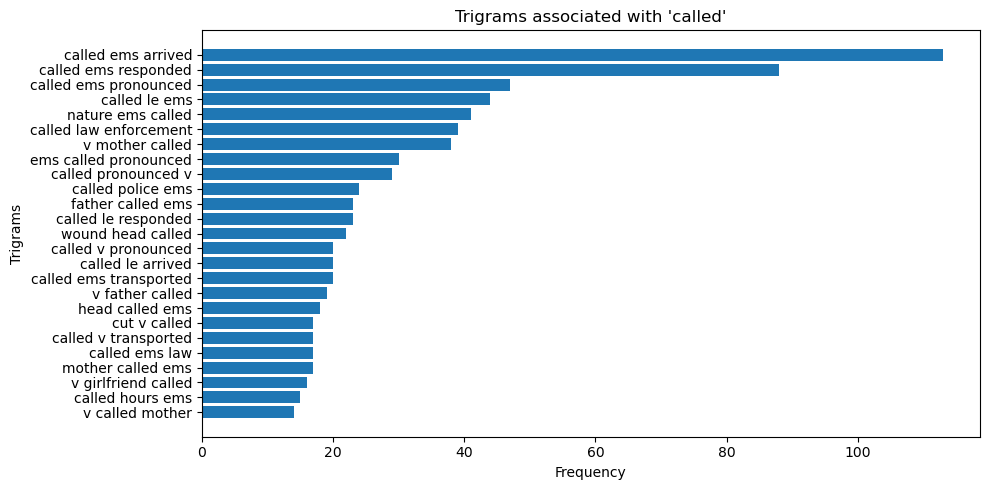

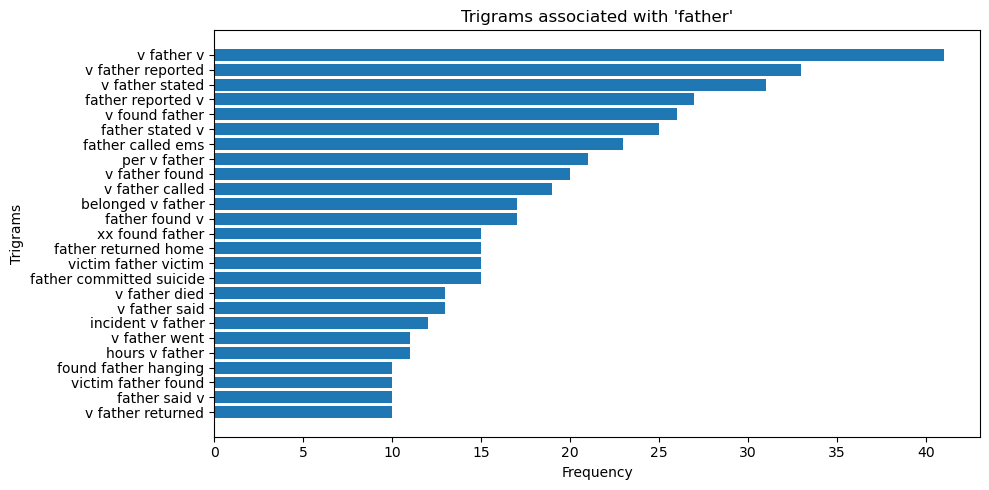

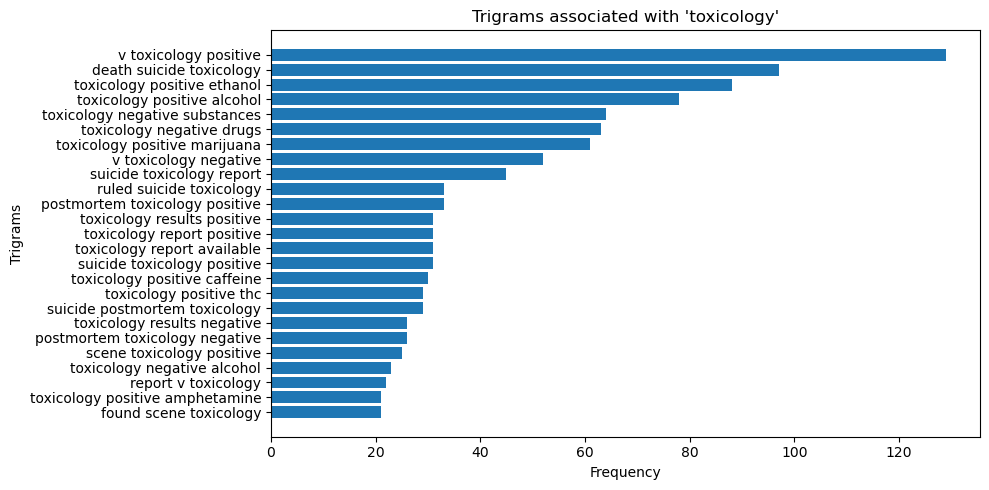

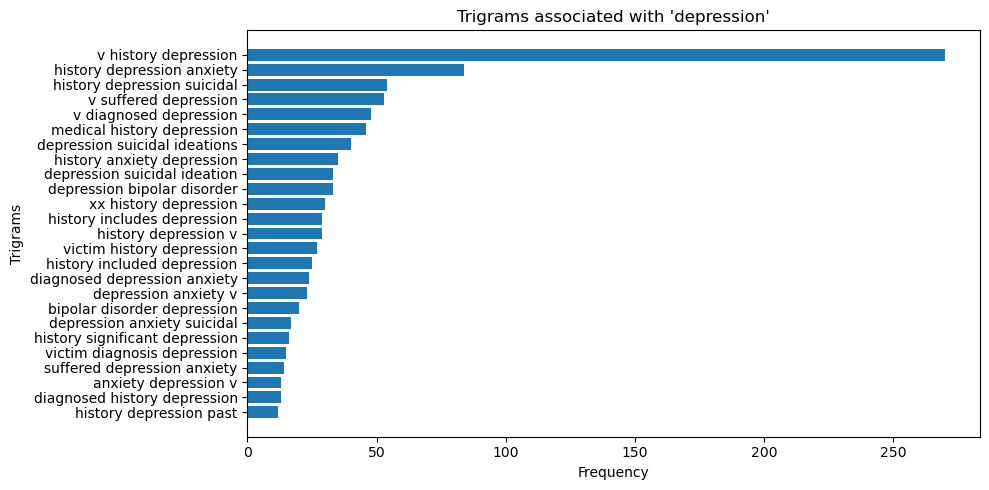

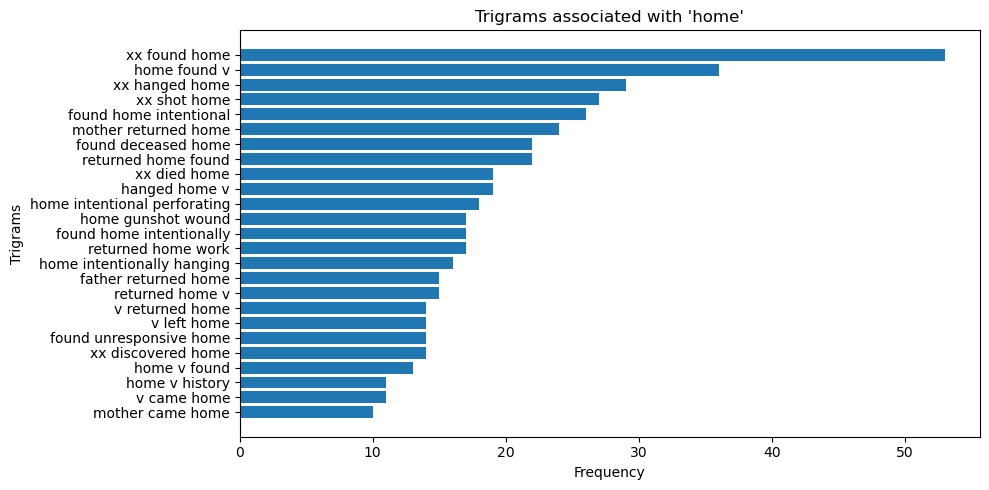

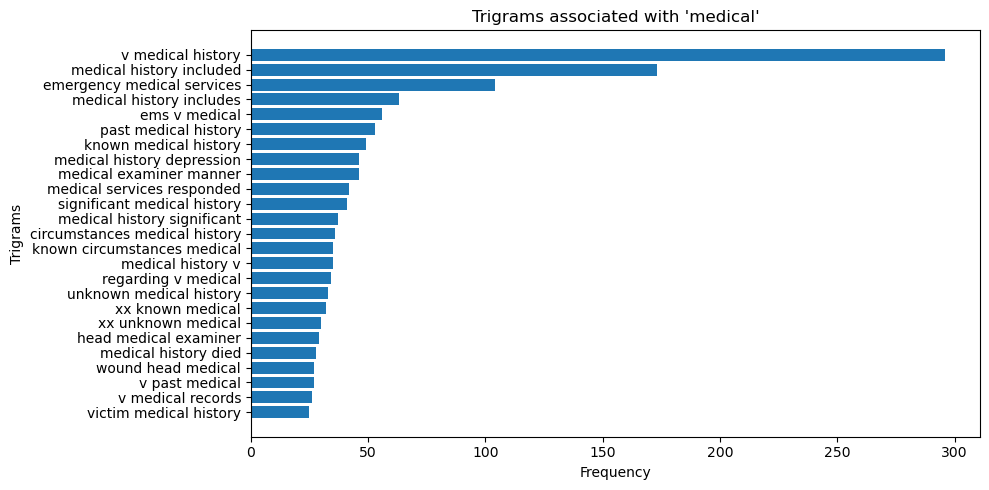

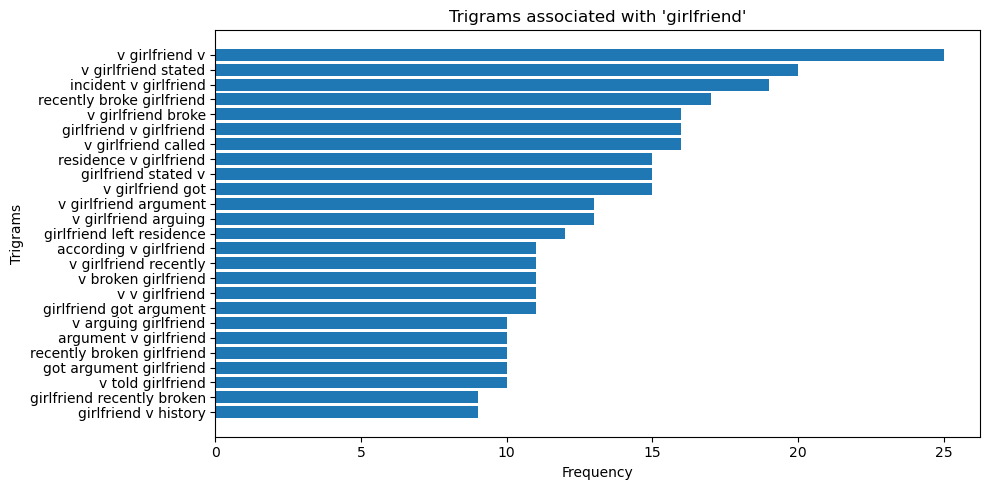

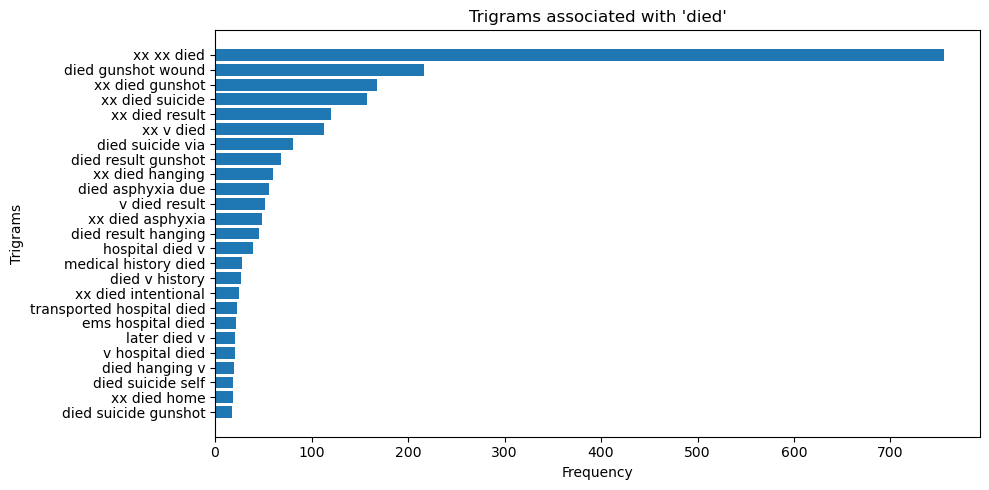

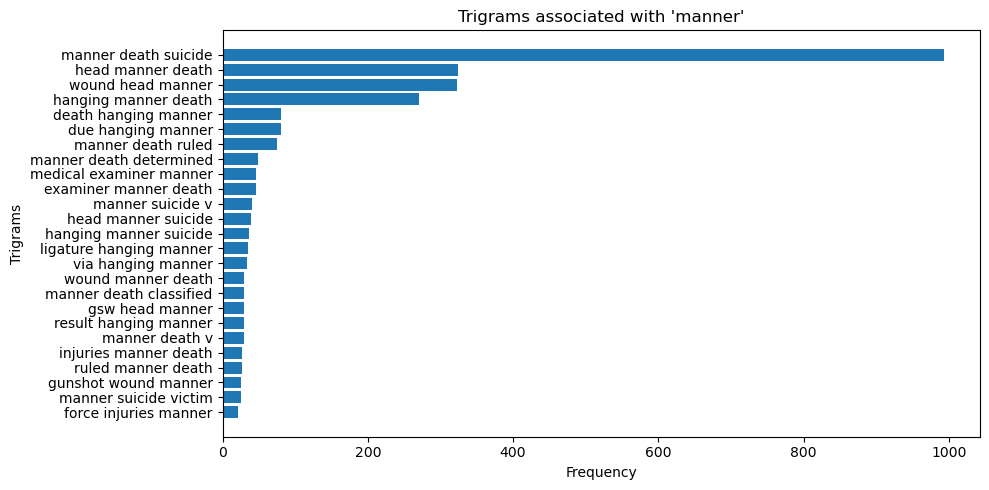

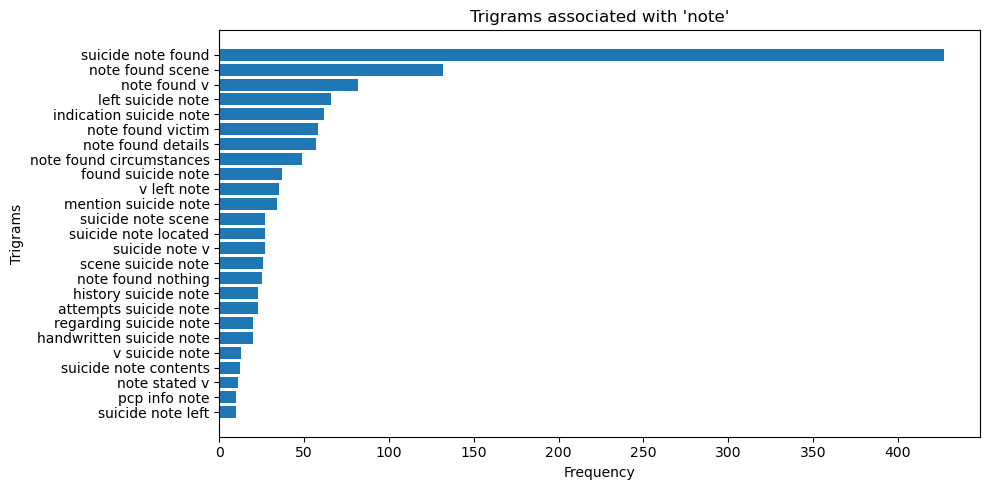

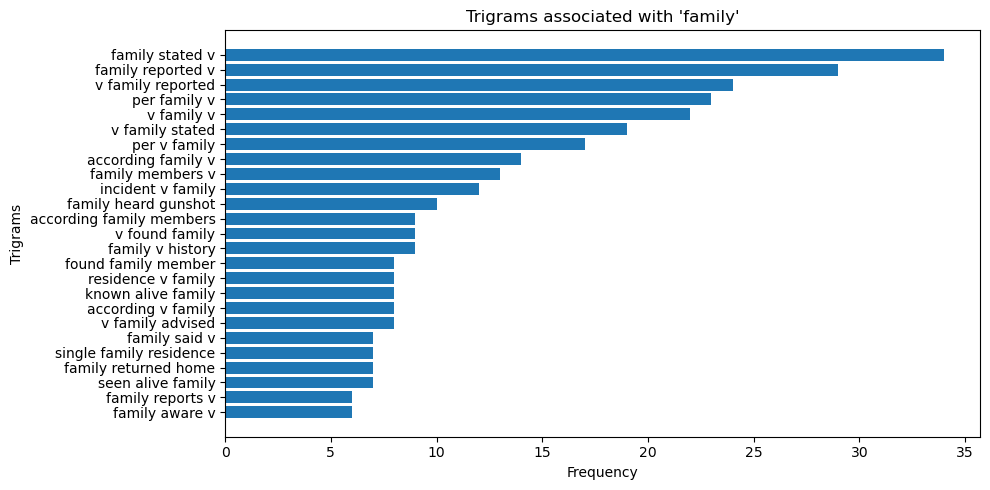

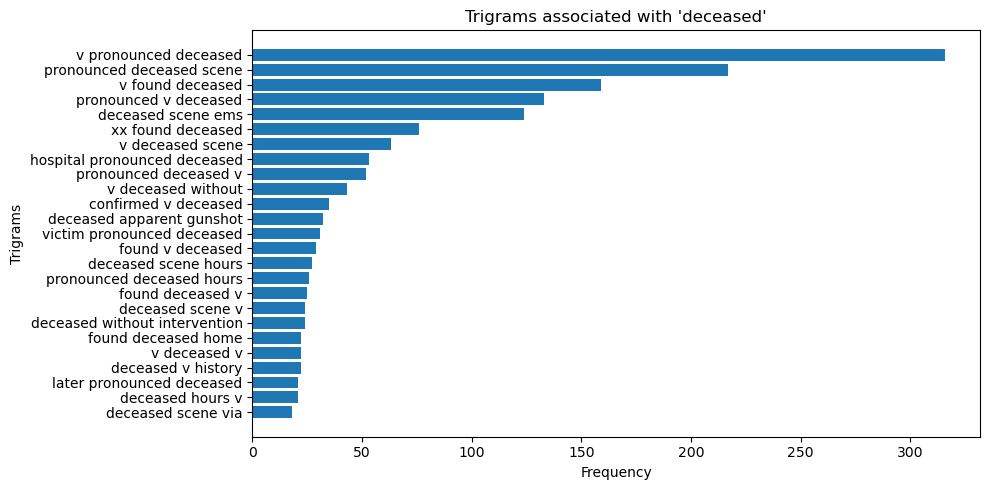

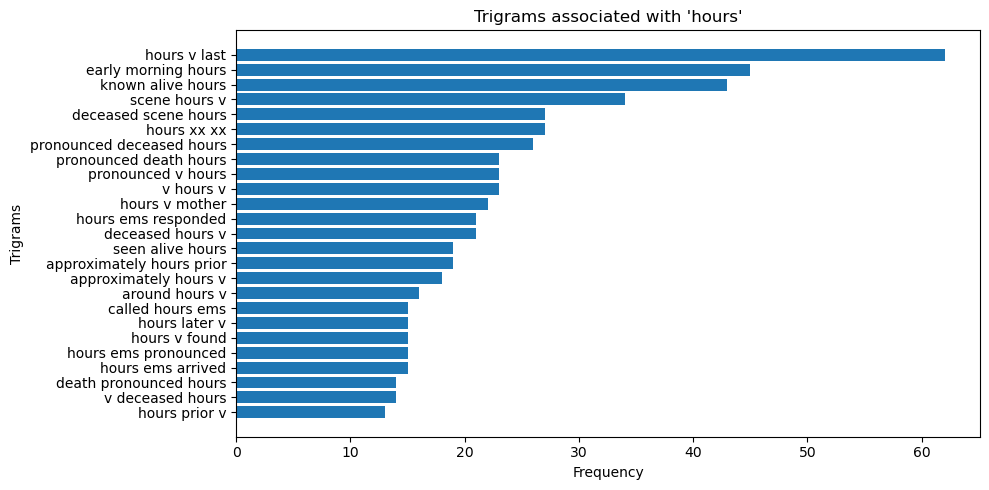

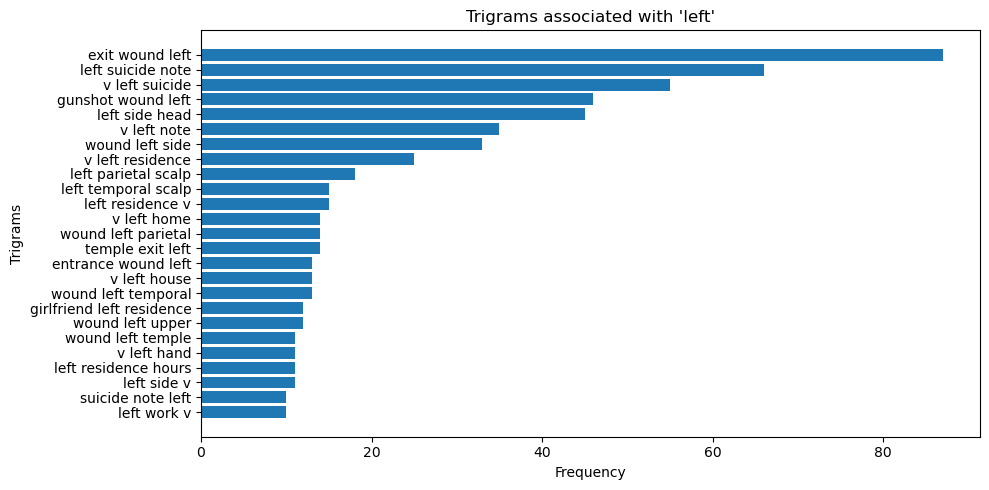

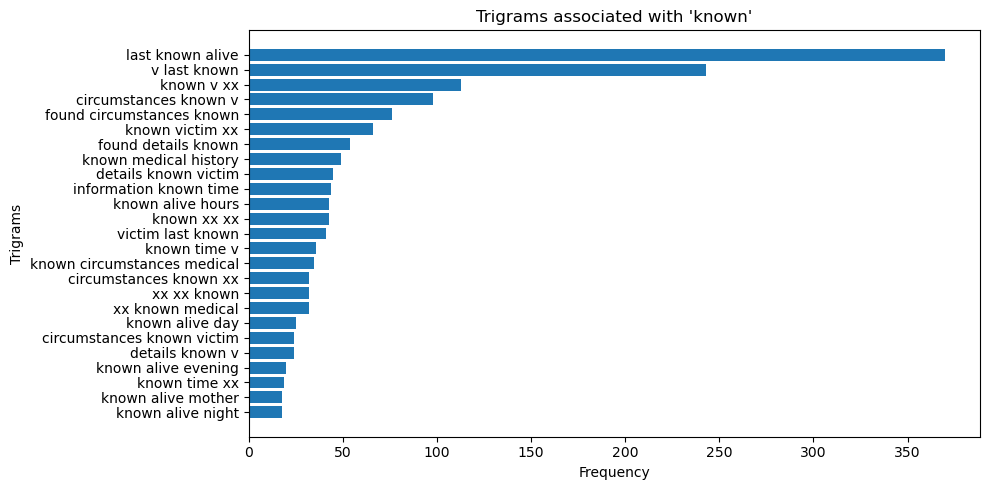

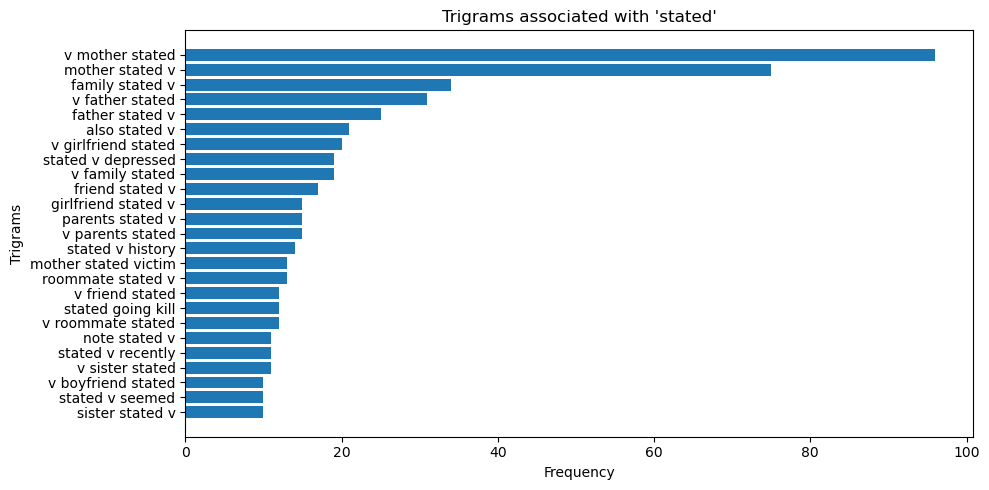

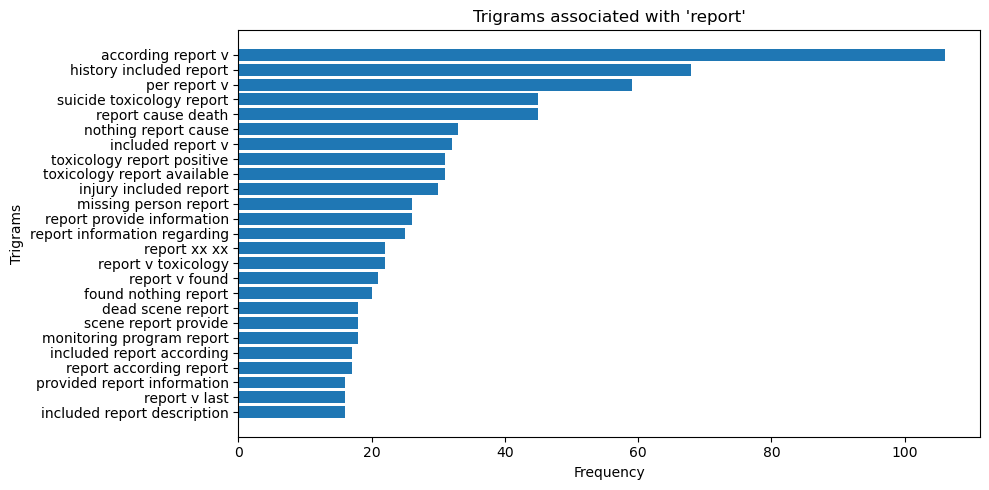

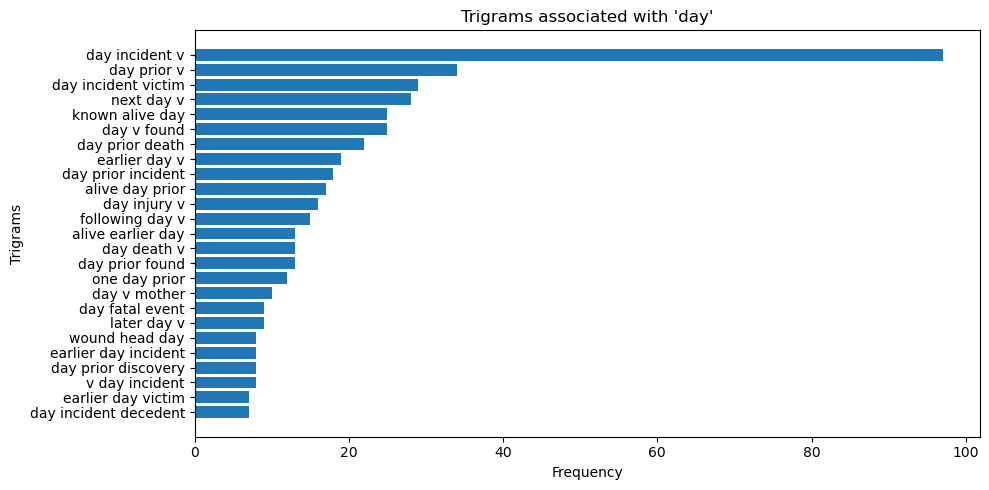

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk

# Define punctuation
punctuation = set(string.punctuation)

# Preprocessing: Tokenize, remove punctuation, and stop words
filtered_text = text.apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) 
                                               if word.isalpha() and word.lower() not in stop_words]))

# Create a CountVectorizer object, remove stop words and lowercase the text
vectorizer = CountVectorizer()

# Fit and transform the vectorizer on the filtered text data
X = vectorizer.fit_transform(filtered_text)

# Convert the matrix to a DataFrame
co_occurrence_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Get the top 35 most common words
top_words = co_occurrence_matrix.sum().sort_values(ascending=False).head(35).index

# Loop through each word in the top_words array
for chosen_word in top_words:
    # Extract trigrams from the preprocessed text data containing the chosen word
    trigrams = [trigram for trigram in ngrams(filtered_text.str.cat(sep=' ').split(), 3) if chosen_word in trigram]

    # Calculate the frequency of each trigram
    trigram_freq = Counter(trigrams)

    # Sort the trigram frequency in descending order and select the top 25 trigrams
    top_trigrams = dict(sorted(trigram_freq.items(), key=lambda item: item[1], reverse=True)[:25])

    # Convert the tuples to strings for display
    top_trigrams = {f"{trigram[0]} {trigram[1]} {trigram[2]}": freq for trigram, freq in top_trigrams.items()}

    # Create a horizontal bar graph
    plt.figure(figsize=(10, 5))  # Create a new figure for each word
    plt.barh(list(top_trigrams.keys()), list(top_trigrams.values()))  # Horizontal bar chart
    plt.title(f"Trigrams associated with '{chosen_word}'")
    plt.xlabel("Frequency")
    plt.ylabel("Trigrams")
    plt.grid(False)  # Disable the grid lines
    plt.gca().invert_yaxis()  # Invert the Y-axis for descending order
    plt.tight_layout()

    # Show the plot
    plt.show()


"v", "xx", "victim", "prior", "ems", "pronounced", "prior", "scene", "death", "found", "called", "day", "report", "deceased" are excluded as the trigrams associated with these words are not particularly useful related to standard variables.

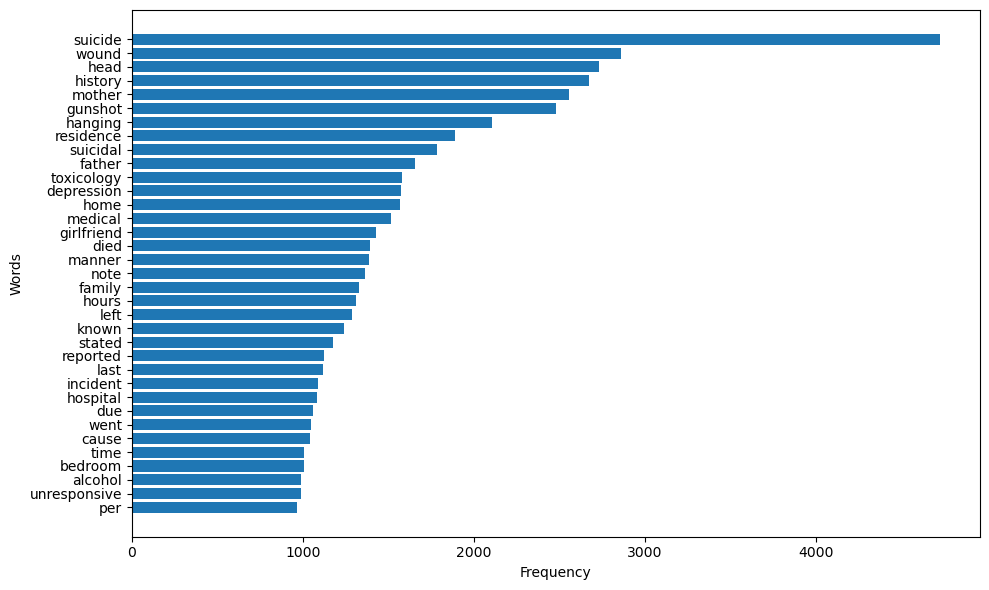

In [4]:
exclude_words = ["v", "xx", "victim", "prior", "ems", "pronounced", "prior", "scene", "death", "found", "called", "day", "report", "deceased"]
tokens = tokens.apply(lambda x: [w for w in x if w not in exclude_words])

# Flatten the list of tokens
all_tokens = [token for sublist in tokens for token in sublist]

# Frequency distribution
freq_dist = nltk.FreqDist(all_tokens)

# Most common words
most_common = freq_dist.most_common(35)
# Most common words
words = [word[0] for word in most_common]
counts = [word[1] for word in most_common]

# Visualization (Horizontal bar graph with reversed Y-axis)
plt.figure(figsize=(10, 6))  # Adjust the size
plt.barh(words, counts)  # Horizontal bar chart
plt.gca().invert_yaxis()  # Reverse the order of Y-axis
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()  # Adjust layout to fit everything
plt.show()